In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 자료 읽어오기

In [3]:
df = pd.read_csv('./csvfiles/mldata/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 자료 데이터확인

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [48]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

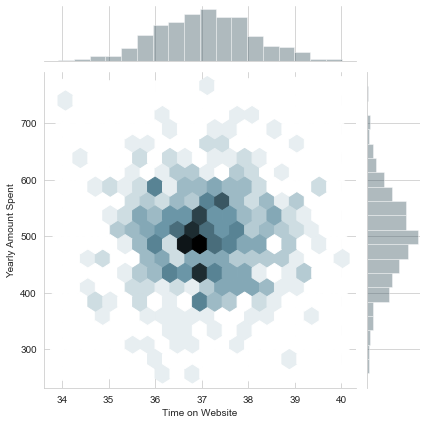

In [51]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, kind='hex')

In [16]:
# Avg. Session Length~Length of Membership을 이용해서 Yearly Amount Spent을 예측
# x에 사용할 컬럼추출
df.iloc[:,3:7:]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


## 예측할 값과 가장 선형을 이루는 그래프를 대강 확인가능

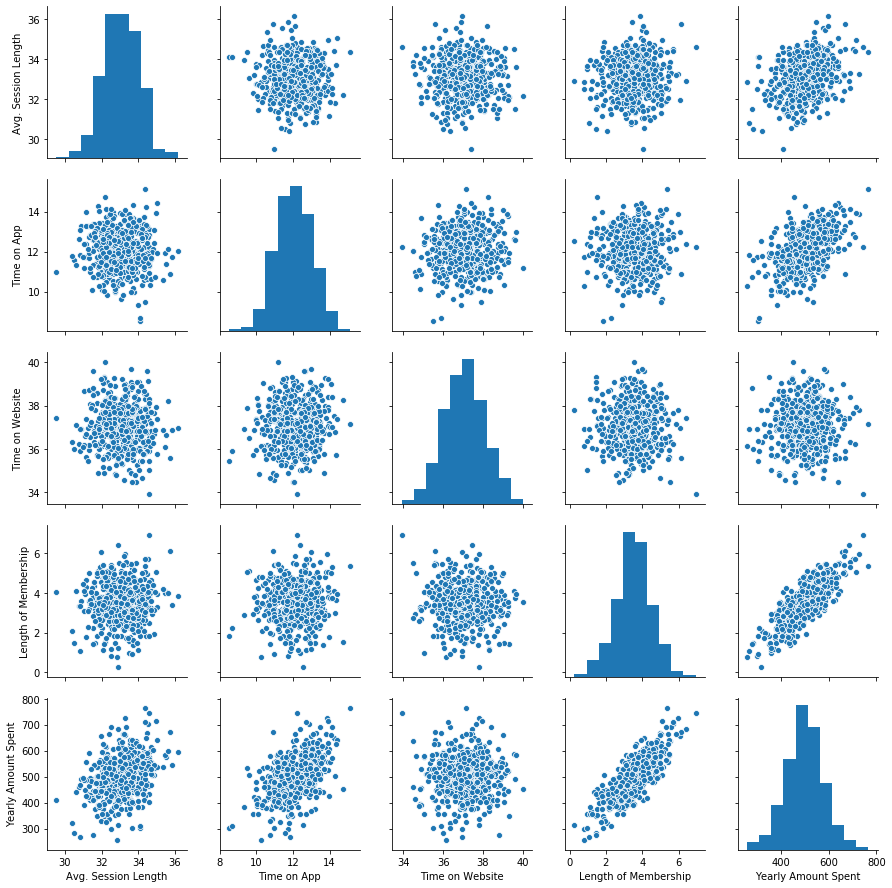

In [17]:
sns.pairplot(df)

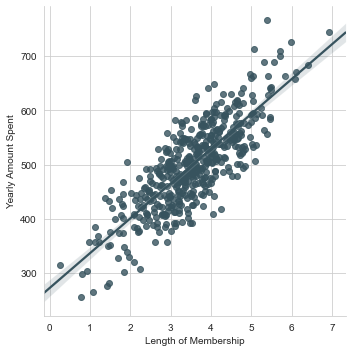

In [53]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

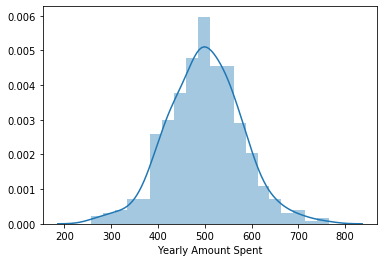

In [18]:
sns.distplot(df['Yearly Amount Spent'])

In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## 예측할 값(컬럼) 을 y로
## 예측에 사용할 값들(컬럼들)을 x에 저장

In [21]:
y = df['Yearly Amount Spent']
x = df.iloc[:,3:7:]
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


## train_test_split를 사용하여 학습용/예측용 데이터 분리

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=77)

## LinearRegression를 알고리즘으로 사용하고
## .fit()함수를 통해 학습후
## .predict()함수를 통해 예측값을 출력하고
## 출력한 예측값과 예측용 데이터의 실제값을 scatter차트로 출력함

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predictions = lr.predict(x_test)
predictions

array([477.89759551, 502.22939725, 548.5918013 , 373.29355458,
       501.50026944, 518.99161811, 473.78029232, 492.88197225,
       435.71294342, 499.00488014, 602.55874285, 551.20310214,
       440.97796413, 469.06895743, 480.24887615, 685.35613911,
       596.94856553, 553.50548612, 535.38656149, 482.59863053,
       456.29598509, 553.55699017, 534.1167913 , 379.96056187,
       426.07664126, 577.32214539, 598.10009132, 445.10031043,
       600.06624491, 574.29428707, 404.48585012, 553.28279062,
       534.38214829, 479.31377414, 479.31964221, 490.16343895,
       449.58826276, 475.2747736 , 514.94491392, 511.50181946,
       498.02055706, 542.0506679 , 411.75310047, 481.25808166,
       510.81173865, 506.82852752, 388.09602905, 421.12586553,
       431.14989355, 766.80517169, 351.39560744, 431.39979413,
       531.56357545, 584.67031257, 609.63297906, 342.90474892,
       536.29203496, 443.57991005, 422.94459348, 673.76534962,
       557.7063369 , 314.62335154, 438.62994617, 481.26

Text(0, 0.5, 'predictions')

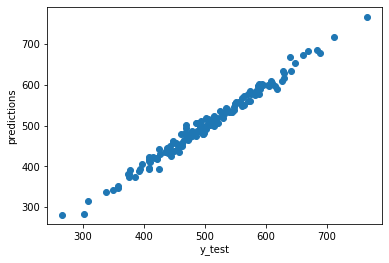

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

## 45º선(예측오차 0)을 그어서 비교

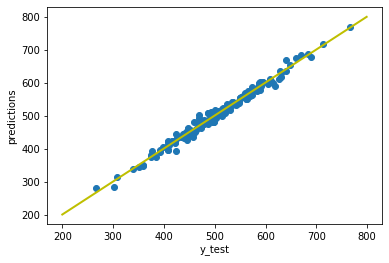

In [40]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.plot(range(200,800),range(200,800), lw=2, c='y')

### 실제값과 예측값 보여주기

In [41]:
df2 = pd.DataFrame({'y_test':y_test, 'Predictions':predictions})
df2.head()

,y_test,Predictions
310,479.614812,477.897596
354,508.771907,502.229397
443,561.516532,548.591801
52,384.626572,373.293555
155,503.978379,501.500269


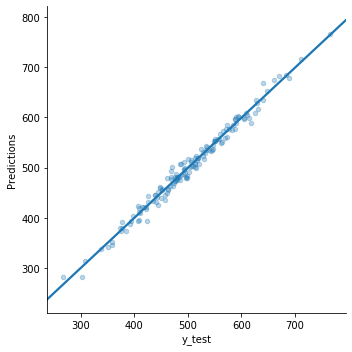

In [47]:
sns.lmplot(x = 'y_test', y= 'Predictions', data=df2,
          ci=None, palette='muted', height=5, scatter_kws={"s":20, "alpha":0.3})

## 예측오차 출력

In [28]:
from sklearn import metrics
print('mean_squared_error : ',metrics.mean_squared_error(y_test, predictions))
print('Root mean_squared_error : ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE : ',metrics.mean_absolute_error(y_test, predictions))

mean_squared_error :  113.89696081016436
Root mean_squared_error :  10.67225190904733
MAE :  8.408963055982994


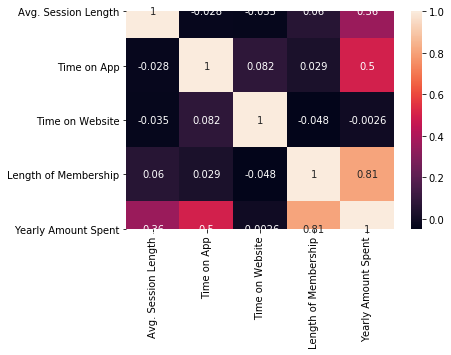

In [33]:
sns.heatmap(df.corr(), annot=True)

In [34]:
# 회원의 연간 소비액을 결정하는 가장 큰 변수는 회원의 가입기간이며
# 앱 사용 시간과 평균 로그인 시간이 그 다음으로 영향을 미치고
# 웹사이트에 접속해있는 시간은 별다른 영향이 없다.

# lr모델의 결정계수 확인

In [55]:
# 결정계수(r**2)
lr.score(x_test, y_test)

0.98405115976938

In [58]:
metrics.r2_score(y_test, predictions)

0.98405115976938

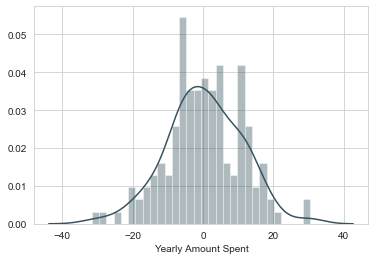

In [59]:
sns.distplot(y_test - predictions, bins=30)

# 각 컬럼의 계수 확인

In [30]:
coef_df = pd.DataFrame(lr.coef_, columns=['Co_efficient'], index=x.columns) # 데이터프레임화
coef_df

,Co_efficient
Avg. Session Length,26.112865
Time on App,38.739249
Time on Website,1.095566
Length of Membership,61.763516


In [60]:
lr.coef_

array([26.11286504, 38.7392485 ,  1.09556591, 61.7635163 ])

In [61]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [31]:
lr.intercept_

-1089.661295581112

In [32]:
# 회원의 연간소비액 y의 계산식
# y = x1*26.11 + x2* 38.73 + x3*1.09 + x4*61.76 -1089